In [1]:
import igraph as gr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import math
import networkx as nx
random.seed(8666)

In [2]:
def communicability_local(G, p, q, qtd = 20):
    X = G.get_adjacency(2).data
    AUX = np.copy(X)
    G_pq = 0
    for i in range(qtd):
        AUX = np.matmul(AUX, X)
        G_pq += AUX[p][q]/math.factorial(i)
    return G_pq

def communicability_global(G, qtd = 20):
    all_comm = []
    for i in range(G.vcount()):
        for j in range(G.vcount()):
            all_comm.append(communicability_local(G, i, j, qtd))
    return sum(all_comm)/(G.vcount()*(G.vcount())-1)

def vulnerability_comm(G, qtd = 20):
    vul_list = []
    comm = communicability_global(G)
    for i in range(G.vcount()):
        H = G.copy()
        H.delete_edges(H.get_inclist()[i])
        vul_list.append((comm - communicability_global(H))/comm)
    return vul_list

def plot_graphs(G, vul):
    convert = G.get_edgelist()
    GNX = nx.Graph(convert)

    facecolor = "gainsboro"
    cmap = plt.cm.rainbow
    if(min(vul) != max(vul)):
        norm = matplotlib.colors.Normalize(vmin=min(vul), vmax=max(vul))
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_facecolor(facecolor)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # only needed for matplotlib < 3.1
    fig.colorbar(sm)
    plt.title("Vulnerability")
    nx.draw_networkx(GNX, pos=nx.kamada_kawai_layout(GNX), cmap='rainbow',
                     node_color=vul, node_size=3000*np.array(vul),
                     font_color='black', style='dotted',
                     font_weight='heavy', font_size=35)
    plt.show()

In [3]:
G = gr.Graph.Star(34)
x = vulnerability_comm(G)

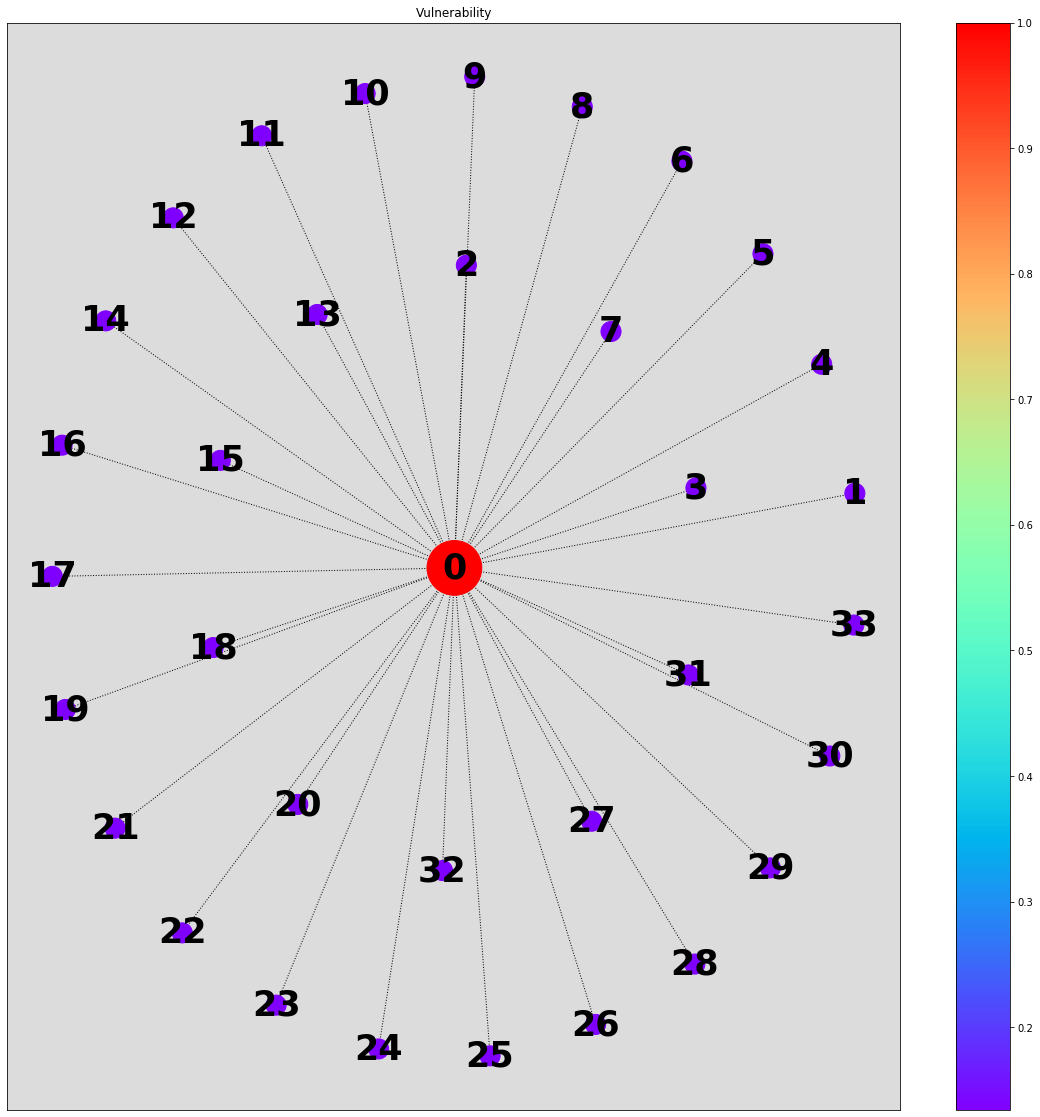

In [4]:
plot_graphs(G, x)

In [11]:
G = gr.Graph.Ring(34)
x = vulnerability_comm(G)
print(x)

[0.09833939261013544, 0.09833939261013544, 0.09833939261013531, 0.09833939261013505, 0.09833939261013505, 0.09833939261013454, 0.0983393926101339, 0.09833939261013352, 0.0983393926101334, 0.09833939261013326, 0.09833939261013289, 0.09833939261013314, 0.09833939261013301, 0.09833939261013326, 0.0983393926101334, 0.09833939261013365, 0.09833939261013365, 0.0983393926101339, 0.09833939261013404, 0.09833939261013429, 0.09833939261013468, 0.09833939261013493, 0.09833939261013531, 0.09833939261013569, 0.09833939261013595, 0.09833939261013633, 0.0983393926101362, 0.09833939261013659, 0.09833939261013633, 0.0983393926101362, 0.0983393926101362, 0.09833939261013569, 0.09833939261013531, 0.09833939261013544]


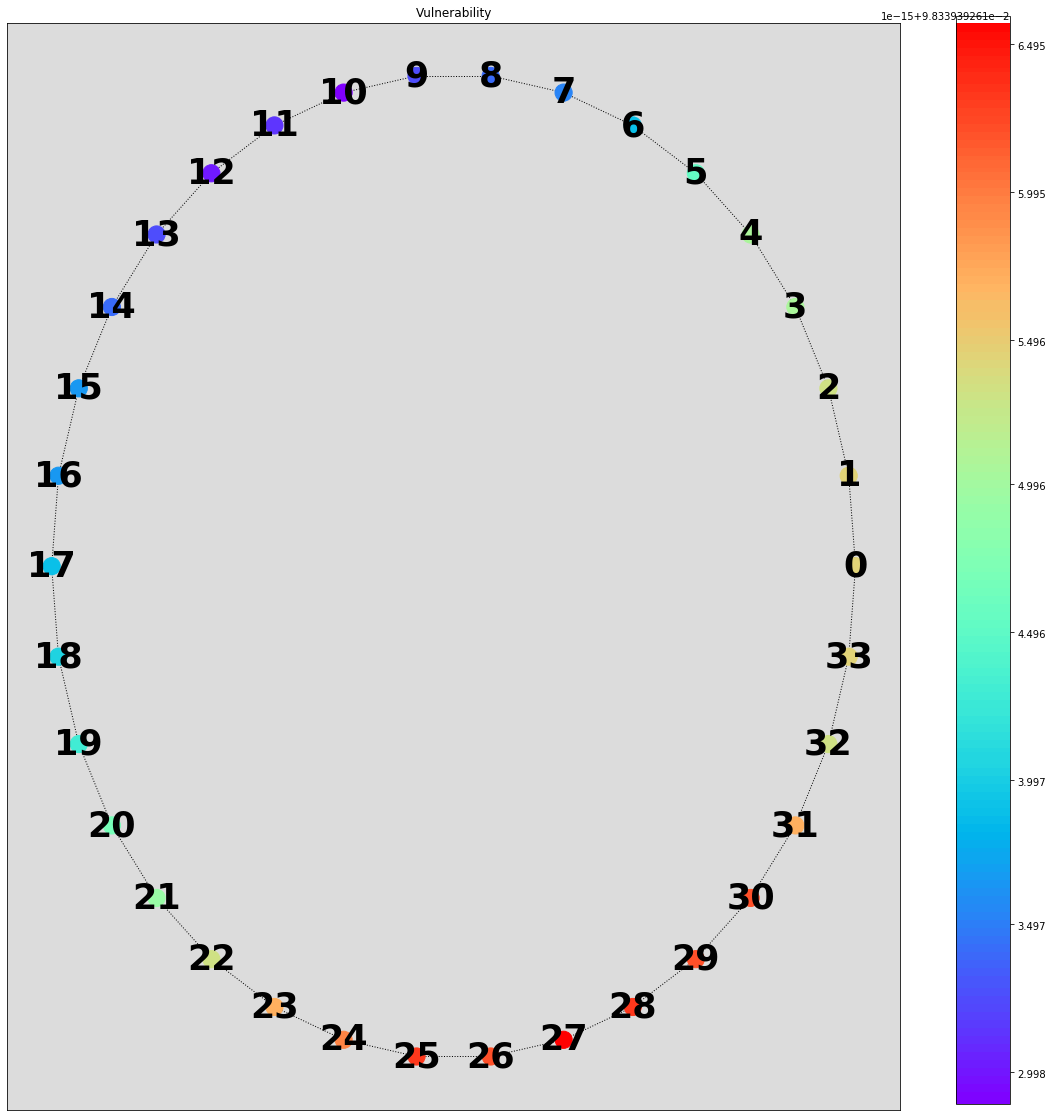

In [12]:
tol = 0.001
for i in range(len(x)):
    if x[i] < tol:
        x[i] = 0
plot_graphs(G, x)

In [7]:
G = gr.Graph.Watts_Strogatz(1, 34, 2, 0.8)
x = vulnerability_comm(G)

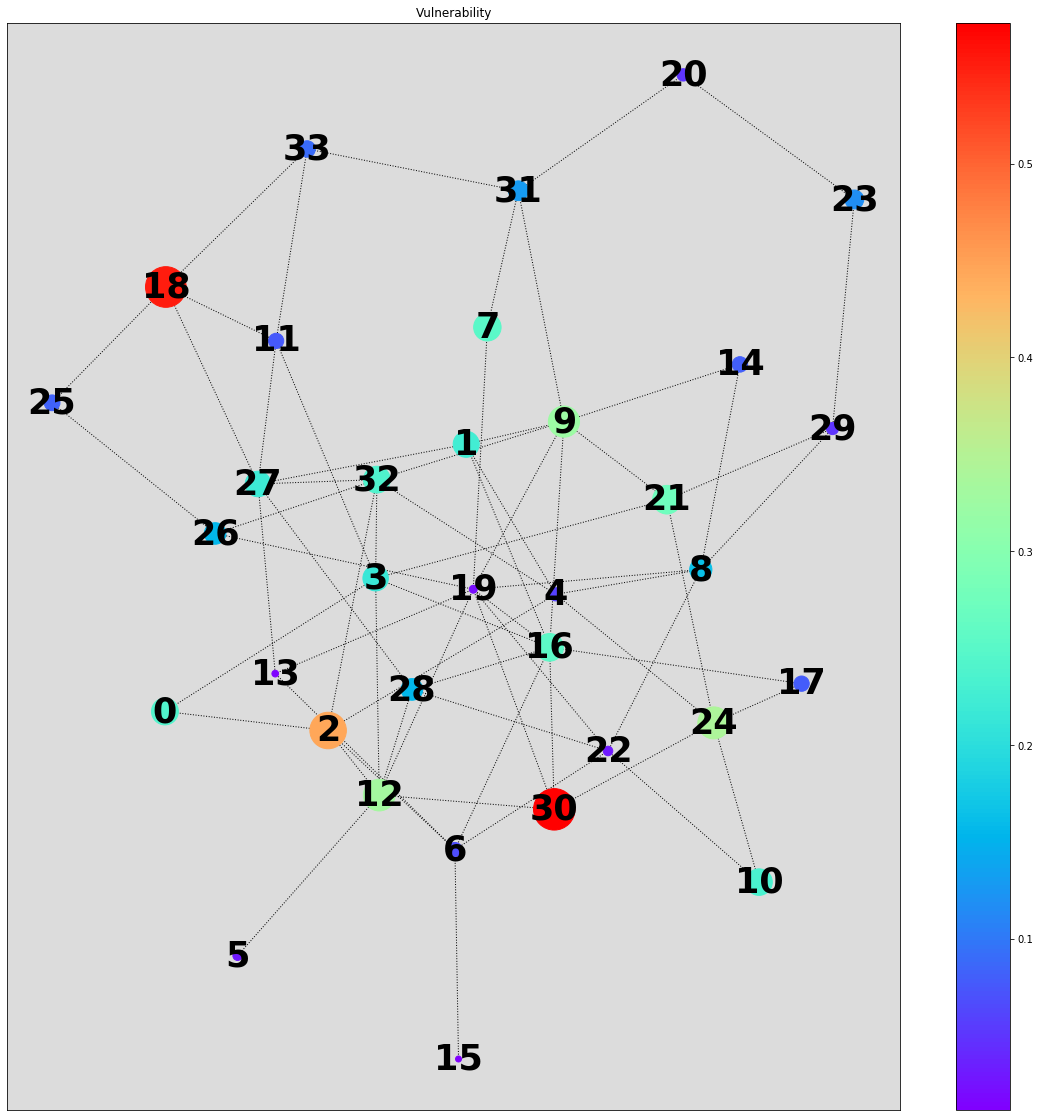

In [9]:
plot_graphs(G, x)